# Question 5 - Use the available variables to construct a model that predicts delays.

In [30]:
#import necassary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
#save csv onto a dataframe
cleaned_data = pd.read_csv('cleaned_data.csv')

In [3]:
#get summary information of dataframe
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14268928 entries, 0 to 14268927
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             int64  
 21  TaxiOut            int64  
 22  Cancelled          int64  
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay    

In [5]:
#get coloumn names in the dataframe
cleaned_data.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [6]:
#create coloumn delay_status where 1 suggests a delay and 0 is not a delay
def delay(a) :
    a = int(a)
    if a <= 0:
        return 0
    else:
        return 1

cleaned_data.loc[:,'delay_status'] = cleaned_data['ArrDelay'].apply(delay)
cleaned_data.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,delay_status
0,0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,...,4,11,0,0,0,0,0,0,0,1
1,1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,...,5,6,0,0,0,0,0,0,0,1
2,2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,...,6,9,0,0,3,0,0,0,31,1
3,3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,...,3,8,0,0,23,0,0,0,3,1
4,4,2007,1,1,1,831.0,830,957.0,1000,WN,...,3,9,0,0,0,0,0,0,0,0


In [8]:
#select necessary coloumns
cleaned_data = cleaned_data[['Month', 'DayofMonth', 'DayOfWeek','CRSDepTime', 'CRSArrTime','CRSElapsedTime', 'Distance', 'TaxiIn', 'TaxiOut','DepDelay','delay_status','CarrierDelay','ArrTime','DepTime']]

<AxesSubplot:>

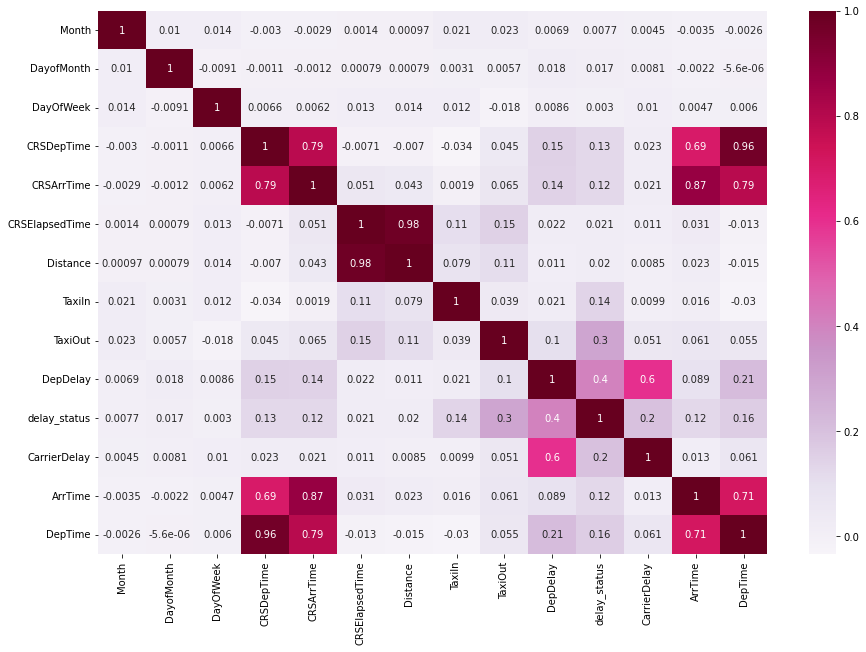

In [43]:
#obtain heatmap to analyze correlation between different features
plt.figure(figsize=(15,10))
correlation = cleaned_data.corr()
sns.heatmap(correlation,cmap='PuRd',annot=True)

In [13]:
#select features with relatively high correlation 
feature_cols = ['CRSDepTime', 'CRSArrTime','TaxiIn', 'TaxiOut','DepDelay','CarrierDelay']
X = cleaned_data[feature_cols]
#assign delay_status as the dependent variable
Y = cleaned_data['delay_status']

In [15]:
#get value count to identify if data is balanced
cleaned_data['delay_status'].value_counts()

0    7626703
1    6642225
Name: delay_status, dtype: int64

In [21]:
#split data into X and Y training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state=1)

In [31]:
#scale data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# fit the model with data
logistic_reg = LogisticRegression(random_state=1)

logistic_reg.fit(X_train, Y_train)
Y_pred = logistic_reg.predict(X_test)

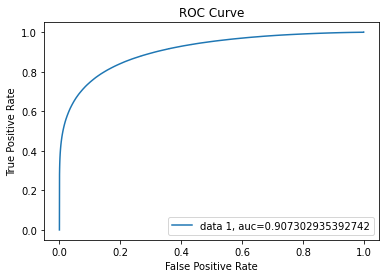

In [34]:
#plot the ROC Curve in order to evaluate the model
Y_pred_proba = logistic_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()